# Упражнение 4

In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import io
import matplotlib.pyplot as plt
import seaborn as sns

##Опросы

In [ ]:
x1 = np.array((1,3, -5, 7))
x2 = np.array((2, -4, 0, 8))

In [ ]:
euc_dist = np.sqrt(np.sum(np.square(x1 - x2)))
euc_dist

8.717797887081348

In [ ]:
manch_dist = np.sum(np.abs(x1 - x2))
manch_dist

14

In [ ]:
cheb_dist = max(np.abs(x1 - x2))
cheb_dist

7

In [ ]:
data = '''
id,X,Y,Class
1,66,76,1
2,81,94,0
3,76,93,1
4,12,51,0
5,94,68,1
6,91,20,0
7,52,32,0
8,58,61,1
9,11,29,0
10,35,92,0
'''

df = pd.read_csv(io.StringIO(data), index_col='id')
df

,X,Y,Class
id,,,
1,56,82,1
2,96,36,0
3,78,73,1
4,69,19,1
5,12,44,1
6,77,32,0
7,55,38,1
8,86,95,1
9,46,99,1


In [ ]:
X = df[['X', 'Y']]
y = df['Class']

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn_model = knn.fit(X, y)

In [ ]:
X_test = np.array([33, 47]).reshape(1, -1)

In [ ]:
knn_prediction = knn.predict(X_test)
knn_prediction

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1])

### Ручной счет

In [ ]:
data = '''
id,X,Y,Class
1,22,86,0
2,78,32,1
3,54,50,1
4,68,80,0
5,18,12,0
6,85,48,0
7,78,10,0
8,50,74,0
9,30,95,0
10,91,12,0
'''

df = pd.read_csv(io.StringIO(data), index_col='id')
X = df[['X', 'Y']]
y = df['Class']

In [ ]:
X_test = pd.Series([30, 30], index=['X', 'Y'])

In [ ]:
distances_euc = np.sqrt((df['X'] - X_test[0])**2 + (df['Y'] - X_test[1])**2)
distances_euc.sort_values(inplace=True)
distances_euc

id
5     21.633308
3     31.240999
2     48.041649
8     48.332184
7     52.000000
1     56.568542
6     57.870545
4     62.801274
10    63.600314
9     65.000000
dtype: float64

In [ ]:
weights = 1/distances_euc**2
weights

id
5     0.002137
3     0.001025
2     0.000433
8     0.000428
7     0.000370
1     0.000312
6     0.000299
4     0.000254
10    0.000247
9     0.000237
dtype: float64

In [ ]:
df['weights'] = weights
df

,X,Y,Class,weights
id,,,,
1,22,86,0,0.000312
2,78,32,1,0.000433
3,54,50,1,0.001025
4,68,80,0,0.000254
5,18,12,0,0.002137
6,85,48,0,0.000299
7,78,10,0,0.000370
8,50,74,0,0.000428
9,30,95,0,0.000237


In [ ]:
df[df['Class']==0]['weights'].sum(), df[df['Class']==1]['weights'].sum()

(0.0042832082846397095, 0.0014578657271926585)

In [ ]:
dist_manhat = np.abs(X['X'] - X_test[0]) + np.abs(X['Y'] - X_test[1])

In [ ]:
dist_manhat.sort_values()

id
5     30
3     44
2     50
1     64
8     64
9     65
7     68
6     73
10    79
4     88
dtype: int64

In [ ]:
df.max(axis=1).max(axis=0)
cheb_idx = df[df['Y']==54].index

# Задание 1

In [2]:
data = '''
id,X,Y,Class
1,66,76,1
2,81,94,0
3,76,93,1
4,12,51,0
5,94,68,1
6,91,20,0
7,52,32,0
8,58,61,1
9,11,29,0
10,35,92,0
'''

df = pd.read_csv(io.StringIO(data), index_col='id')
X = df[['X', 'Y']]
y = df['Class']

In [4]:
X_test = np.array([98, 88])

In [5]:
df['euclidian'] = np.sqrt((df['X'] - X_test[0])**2 + (df['Y'] - X_test[1])**2)
df.sort_values('euclidian').head(3)

,X,Y,Class,euclidian
id,,,,
2,81,94,0,18.027756
5,94,68,1,20.396078
3,76,93,1,22.561028


In [6]:
df['manhat'] = np.abs(X['X'] - X_test[0]) + np.abs(X['Y'] - X_test[1])

In [7]:
df.sort_values('manhat').head(3)

,X,Y,Class,euclidian,manhat
id,,,,,
2,81,94,0,18.027756,23
5,94,68,1,20.396078,24
3,76,93,1,22.561028,27


# Задание 2

In [49]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
import seaborn as sns
from matplotlib import pyplot as plt

In [50]:
df = pd.read_csv('https://courses.openedu.ru/assets/courseware/v1/3b5e697be14f493785e3d21577f9fcb3/asset-v1:ITMOUniversity+MLDATAN+spring_2023_ITMO_bac+type@asset+block/adult_data_train.csv')

In [51]:
df = df.drop(['education', 'marital-status'], axis=1)
df.head()

,age,workclass,fnlwgt,education-num,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,32,Private,37210,13,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
1,43,Private,101950,14,Exec-managerial,Not-in-family,White,Female,0,0,45,United-States,0
2,20,?,122244,9,?,Not-in-family,White,Female,0,0,28,United-States,0
3,40,Local-gov,24763,10,Transport-moving,Unmarried,White,Male,6849,0,40,United-States,0
4,24,Private,113936,13,Prof-specialty,Own-child,White,Male,0,0,40,United-States,0


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26048 entries, 0 to 26047
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             26048 non-null  int64 
 1   workclass       26048 non-null  object
 2   fnlwgt          26048 non-null  int64 
 3   education-num   26048 non-null  int64 
 4   occupation      26048 non-null  object
 5   relationship    26048 non-null  object
 6   race            26048 non-null  object
 7   sex             26048 non-null  object
 8   capital-gain    26048 non-null  int64 
 9   capital-loss    26048 non-null  int64 
 10  hours-per-week  26048 non-null  int64 
 11  native-country  26048 non-null  object
 12  label           26048 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 2.6+ MB


(array([19775.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  6273.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

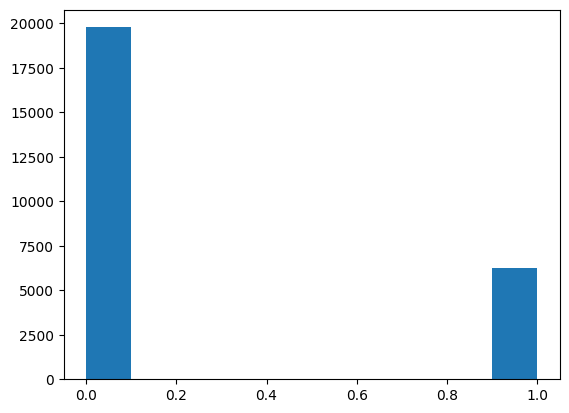

In [53]:
plt.hist(df['label'])

In [54]:
df[df['label']==0]['label'].count()/df['label'].count()

0.7591753685503686

###Разбиение

In [55]:
non_num_params = ['workclass', 'occupation', 'relationship', 'race', 'sex', 'native-country']

In [56]:
X = df.drop('label', axis=1).drop(non_num_params, axis=1)
y = df['label']

In [57]:
rand_state = 23

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=rand_state,
                                                    stratify=y)

In [59]:
X_train['fnlwgt'].mean()

189715.1720414627

### Обучение модели

In [60]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [61]:
f1_score(y_test, y_pred)

0.4016186140617097

### Нормализация и обучение

In [62]:
min_max_scaler = MinMaxScaler().fit(X_train[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week']])
X_train[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week']] = min_max_scaler.transform(X_train[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week']])
X_test[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week']] = min_max_scaler.transform(X_test[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week']])

In [63]:
X_train['fnlwgt'].mean()

0.12050241917487044

In [64]:
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
f1_score(y_test, y_pred)

0.535288725939505

### Вернуть нечисловые признаки

In [65]:
X = df.drop('label', axis=1)
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=rand_state,
                                                    stratify=y)

In [66]:
non_num_params

['workclass', 'occupation', 'relationship', 'race', 'sex', 'native-country']

workclass


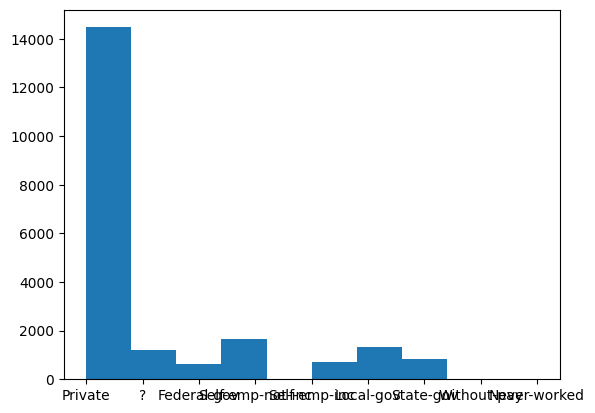

occupation


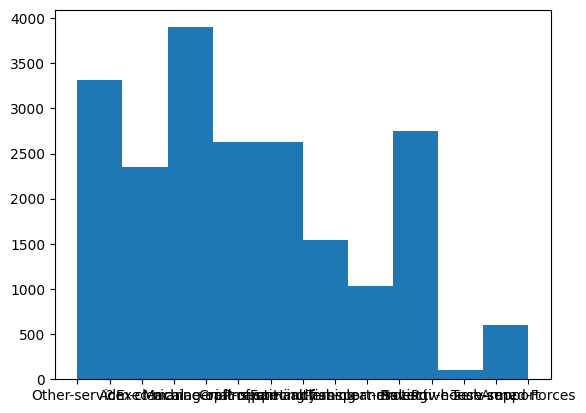

relationship


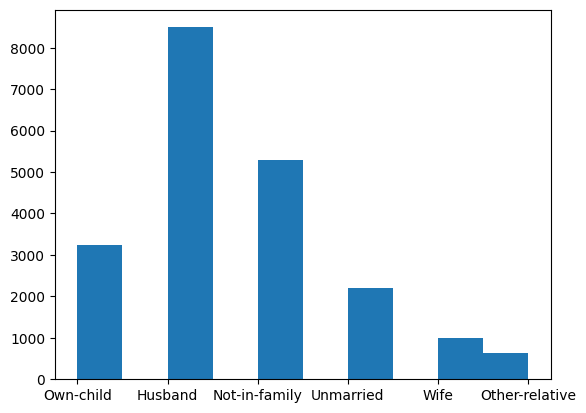

race


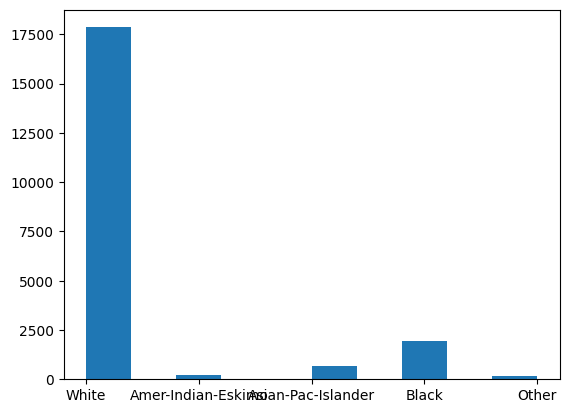

sex


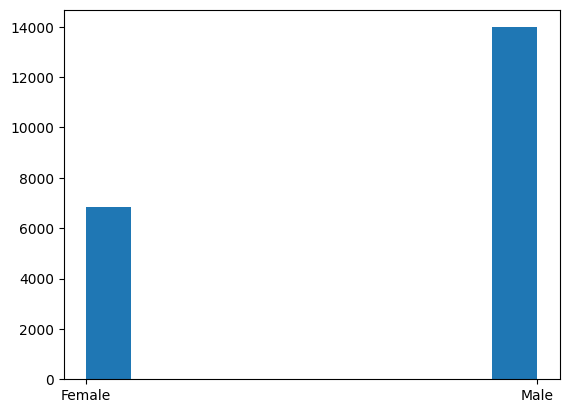

native-country


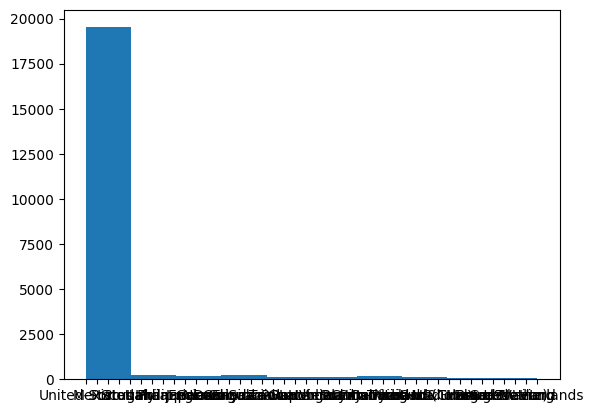

In [67]:
for i in non_num_params:
  print(i)
  plt.hist(X_train[i])
  plt.show()

## Очистка и one hot

In [68]:
df[df.isin(['?']).any(axis=1)].shape

(1914, 13)

In [69]:
df_clean = df.drop(df[df.isin(['?']).any(axis=1)].index, axis=0).copy()

In [70]:
df_clean = df_clean.join(pd.get_dummies(df_clean[non_num_params], drop_first=True))
df_clean = df_clean.drop(df_clean[non_num_params], axis=1)

In [71]:
df_clean.shape

(24134, 76)

### Разбиение и Обучение

In [72]:
X = df_clean.drop('label', axis=1)
y = df_clean['label']
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=rand_state,
                                                    stratify=y)

In [73]:
min_max_scaler = MinMaxScaler().fit(X_train[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week']])
X_train[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week']] = min_max_scaler.transform(X_train[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week']])
X_test[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week']] = min_max_scaler.transform(X_test[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week']])

In [74]:
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
f1_score(y_test, y_pred)

0.6088888888888889

## Заполнение пропусков

In [75]:
df_filled = df[df.isin(['?']).any(axis=1)].copy()

In [76]:
X = df.drop('label', axis=1).copy()
y = df['label']

In [77]:
max_count = []

for i in non_num_params:
  max_count.append(X[i].value_counts().index.to_list()[0])

max_value = pd.Series(index=non_num_params, data=max_count)
max_value

workclass                Private
occupation        Prof-specialty
relationship             Husband
race                       White
sex                         Male
native-country     United-States
dtype: object

In [78]:
for col in df_filled[non_num_params]:
  for idx, row in df_filled[col].items():
    if (row=='?'):
      df_filled.loc[idx, col] = max_value[col]

In [79]:
df_clean = df.drop(df[df.isin(['?']).any(axis=1)].index, axis=0)

In [80]:
df = df_clean.append(df_filled).sort_index()

<ipython-input-80-79da04f3e78c>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df_clean.append(df_filled).sort_index()


### One hot

In [81]:
num_params = df.drop(non_num_params, axis=1).drop('label', axis=1).columns

In [82]:
df = df.join(pd.get_dummies(df[non_num_params], drop_first=True))
df = df.drop(df[non_num_params], axis=1)

In [83]:
df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,label,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,32,37210,13,0,0,45,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,43,101950,14,0,0,45,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,20,122244,9,0,0,28,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,40,24763,10,6849,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,24,113936,13,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


### Split

In [84]:
X = df.drop('label', axis=1)
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=rand_state,
                                                    stratify=y)

### Scaling

In [85]:
min_max_scaler = MinMaxScaler().fit(X_train[num_params])
X_train[num_params] = min_max_scaler.transform(X_train[num_params])
X_test[num_params] = min_max_scaler.transform(X_test[num_params])

In [86]:
X_train.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
22595,0.000000,0.097945,0.466667,0.0,0.0,0.153061,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
17772,0.027397,0.104408,0.600000,0.0,0.0,0.397959,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4472,0.054795,0.091937,0.533333,0.0,0.0,0.397959,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
9162,0.219178,0.108922,0.600000,0.0,0.0,0.704082,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
19560,0.095890,0.068717,0.800000,0.0,0.0,0.397959,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


### Обучение и оценка

In [87]:
knn_model = knn.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
f1_score(y_test, y_pred)

0.5992284612087443

# Задание 3


In [88]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
import seaborn as sns
from matplotlib import pyplot as plt

##Подготовка

In [89]:
df = pd.read_csv('https://courses.openedu.ru/assets/courseware/v1/3b5e697be14f493785e3d21577f9fcb3/asset-v1:ITMOUniversity+MLDATAN+spring_2023_ITMO_bac+type@asset+block/adult_data_train.csv')

In [90]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,32,Private,37210,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
1,43,Private,101950,Masters,14,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,45,United-States,0
2,20,?,122244,HS-grad,9,Never-married,?,Not-in-family,White,Female,0,0,28,United-States,0
3,40,Local-gov,24763,Some-college,10,Divorced,Transport-moving,Unmarried,White,Male,6849,0,40,United-States,0
4,24,Private,113936,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,0


In [91]:
df = df.drop(['education','marital-status', 'fnlwgt' ], axis=1)

In [92]:
non_num_cols = ['workclass', 'occupation', 'relationship', 'race', 'sex', 'native-country']
num_cols = ['age', 'education-num', 'capital-gain',
            'capital-loss', 'hours-per-week']

<ipython-input-93-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

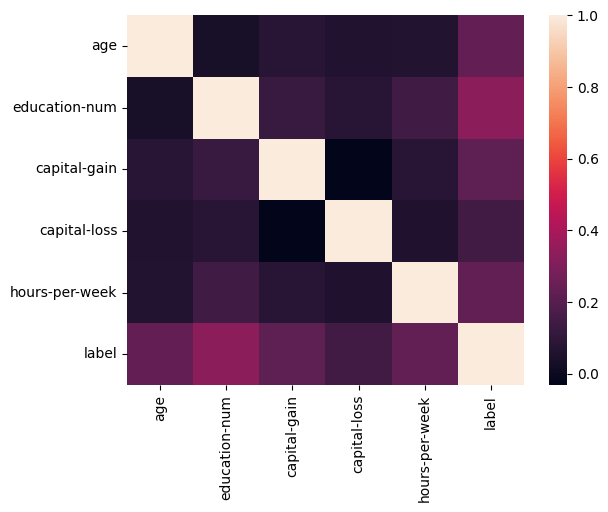

In [93]:
sns.heatmap(df.corr())

### Заполнить пропуски

In [94]:
df[df.isin(['?']).any(axis=1)].head()

,age,workclass,education-num,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
2,20,?,9,?,Not-in-family,White,Female,0,0,28,United-States,0
9,28,?,10,?,Own-child,White,Female,0,0,20,?,0
14,60,?,9,?,Not-in-family,White,Male,0,0,35,Poland,0
15,34,?,10,?,Wife,White,Female,0,0,20,United-States,1
40,36,?,11,?,Not-in-family,White,Female,0,0,20,United-States,0


In [95]:
X = df.drop('label', axis=1).copy()
y = df['label']

In [96]:
max_count = []

for i in non_num_cols:
  max_count.append(X[i].value_counts().index.to_list()[0])

max_value = pd.Series(index=non_num_cols, data=max_count)
max_value

workclass                Private
occupation        Prof-specialty
relationship             Husband
race                       White
sex                         Male
native-country     United-States
dtype: object

In [97]:
for col in df:
  for idx, row in df[col].items():
    if row=='?':
      df.loc[idx, col] = max_value[col]

In [98]:
df.head()

,age,workclass,education-num,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,32,Private,13,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
1,43,Private,14,Exec-managerial,Not-in-family,White,Female,0,0,45,United-States,0
2,20,Private,9,Prof-specialty,Not-in-family,White,Female,0,0,28,United-States,0
3,40,Local-gov,10,Transport-moving,Unmarried,White,Male,6849,0,40,United-States,0
4,24,Private,13,Prof-specialty,Own-child,White,Male,0,0,40,United-States,0


### One Hot

In [99]:
df = df.join(pd.get_dummies(df[non_num_cols], drop_first=True))
df = df.drop(df[non_num_cols], axis=1)

In [100]:
df.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,label,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,32,13,0,0,45,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,43,14,0,0,45,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,20,9,0,0,28,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,40,10,6849,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,24,13,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


### Scaler

In [101]:
X = df.drop('label', axis=1)
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=rand_state,
                                                    stratify=y)

In [102]:
# scaler = MinMaxScaler()
# scaler = StandardScaler()
# scaler.fit(X_train[num_cols])
# X_train[num_cols] = scaler.transform(X_train[num_cols])
# X_test[num_cols] = scaler.transform(X_test[num_cols])

In [103]:
X_train.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
22595,17,8,0,0,16,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
17772,19,10,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4472,21,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
9162,33,10,0,0,70,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
19560,24,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


### Модель

In [104]:
knn_model = knn.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
f1_score(y_test, y_pred)

0.6564059900166389


## Тестовые данные

In [105]:
data = pd.read_csv('https://courses.openedu.ru/assets/courseware/v1/81d9cf5671cf3576fd7776f5165d9cc5/asset-v1:ITMOUniversity+MLDATAN+spring_2023_ITMO_bac+type@asset+block/adult_data_reserved.csv')

### Почистить

In [106]:
data = data.drop(['education','marital-status', 'fnlwgt' ], axis=1)

### Заполнить пропуски

In [107]:
data[data.isin(['?']).any(axis=1)]

,age,workclass,education-num,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
1,20,?,10,?,Own-child,White,Male,0,0,40,United-States
10,78,?,9,?,Not-in-family,White,Female,0,0,1,United-States
25,18,?,10,?,Own-child,White,Male,0,0,30,United-States
72,47,?,9,?,Husband,White,Male,5178,0,30,Canada
85,32,Self-emp-not-inc,13,Exec-managerial,Husband,Black,Male,0,0,40,?
...,...,...,...,...,...,...,...,...,...,...,...
6443,32,?,10,?,Unmarried,White,Female,0,0,40,United-States
6444,82,?,11,?,Not-in-family,White,Female,0,0,8,United-States
6457,48,?,9,?,Own-child,White,Female,0,0,18,United-States
6477,22,?,9,?,Unmarried,Black,Female,0,0,35,United-States


In [108]:
max_count = []

for i in non_num_cols:
  max_count.append(data[i].value_counts().index.to_list()[0])

max_value = pd.Series(index=non_num_cols, data=max_count)
max_value

workclass               Private
occupation         Adm-clerical
relationship            Husband
race                      White
sex                        Male
native-country    United-States
dtype: object

In [109]:
for col in data:
  for idx, row in data[col].items():
    if row=='?':
      data.loc[idx, col] = max_value[col]

### One Hot

In [110]:
data = data.join(pd.get_dummies(data[non_num_cols], drop_first=True))
data = data.drop(non_num_cols, axis=1)

### Scaler

In [111]:
# scaler = MinMaxScaler()
# scaler = StandardScaler()
# scaler.fit(data[num_cols])
# data[num_cols] = scaler.transform(data[num_cols])

In [112]:
loc_holand = X_train.columns.get_loc('native-country_Holand-Netherlands')

In [113]:
data.insert(loc_holand, 'native-country_Holand-Netherlands', 0)

## Предсказания

In [114]:
y_pred = knn_model.predict(data)

In [115]:
print(y_pred)

[1 0 1 ... 1 0 0]


In [116]:
y_pred = pd.DataFrame(y_pred)

In [117]:
y_pred.value_counts()

0    5049
1    1464
dtype: int64

In [118]:
y_pred.transpose().to_csv(r'/content/predict.csv', index= False)

#Упражнение 5 в Excel

In [ ]:
https://docs.google.com/spreadsheets/d/18zi7_eYI90oLriefWp35SfearsbwTbKuiPIHCaVE8zA/edit?usp=sharing